In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
with open('../data/raw/static_dataset.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head(1)

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_tier,...,participant10_champion_infoDefense,participant10_champion_infoMagic,participant10_champion_infoDifficulty,participant10_champion_tier,participant10_champion_win_rate,participant10_champion_pick_rate,participant10_champion_ban_rate,participant10_champion_matches,participant10_teamId,participant10_win
0,1982,1696715184351,13.19.534.5972,11,420,19,13,EUW1,864,MASTER,...,2,7,10,D,46.8,12.7,12.7,9632,200,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38161 entries, 0 to 0
Columns: 368 entries, gameDuration to participant10_win
dtypes: bool(50), float64(30), int64(176), object(112)
memory usage: 94.7+ MB


In [5]:
import os
import sys

print(os.path.dirname(sys.executable))

C:\Users\morit\AppData\Local\pypoetry\Cache\virtualenvs\leaguify-VaCbhr8h-py3.11\Scripts


In [6]:
df.describe()

,gameDuration,gameCreation,mapId,queueId,patch,seasonId,participant1_level,participant1_rank,participant1_leaguePoints,participant1_wins,...,participant10_champion_championNumber,participant10_champion_infoAttack,participant10_champion_infoDefense,participant10_champion_infoMagic,participant10_champion_infoDifficulty,participant10_champion_win_rate,participant10_champion_pick_rate,participant10_champion_ban_rate,participant10_champion_matches,participant10_teamId
count,38161.000000,3.816100e+04,38161.0,38161.0,38161.000000,38161.0,38161.000000,38161.000000,38161.000000,38161.000000,...,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,38161.000000,38161.00000,38161.000000
mean,1612.640418,1.697006e+12,11.0,420.0,19.540893,13.0,384.106339,1.324703,336.874296,146.828490,...,261.824009,3.828175,4.885485,5.754697,5.434920,50.537488,7.639320,7.639320,24847.80619,198.637352
std,335.086815,6.727846e+08,0.0,0.0,0.637129,0.0,282.104317,0.785208,345.614190,116.667037,...,234.080270,2.360424,2.488830,2.508814,2.153909,1.246156,8.113065,8.113065,13755.85117,11.593597
min,960.000000,1.689858e+12,11.0,420.0,14.000000,13.0,31.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,45.640000,0.100000,0.100000,1564.00000,100.000000
25%,1381.000000,1.696707e+12,11.0,420.0,19.000000,13.0,137.000000,1.000000,50.000000,54.000000,...,53.000000,2.000000,3.000000,5.000000,5.000000,49.800000,2.700000,2.700000,13162.00000,200.000000
50%,1593.000000,1.697134e+12,11.0,420.0,20.000000,13.0,330.000000,1.000000,203.000000,124.000000,...,154.000000,4.000000,5.000000,6.000000,6.000000,50.550000,5.700000,5.700000,24098.00000,200.000000
75%,1826.000000,1.697462e+12,11.0,420.0,20.000000,13.0,573.000000,1.000000,586.000000,214.000000,...,497.000000,5.000000,6.000000,8.000000,7.000000,51.150000,6.200000,6.200000,32505.00000,200.000000
max,3577.000000,1.697954e+12,11.0,420.0,20.000000,13.0,1872.000000,4.000000,1927.000000,729.000000,...,950.000000,10.000000,10.000000,10.000000,10.000000,54.750000,48.900000,48.900000,181410.00000,200.000000


In [7]:
df.dtypes

gameDuration                          int64
gameCreation                          int64
gameVersion                          object
mapId                                 int64
queueId                               int64
                                     ...   
participant10_champion_pick_rate    float64
participant10_champion_ban_rate     float64
participant10_champion_matches        int64
participant10_teamId                  int64
participant10_win                      bool
Length: 368, dtype: object

<Axes: >

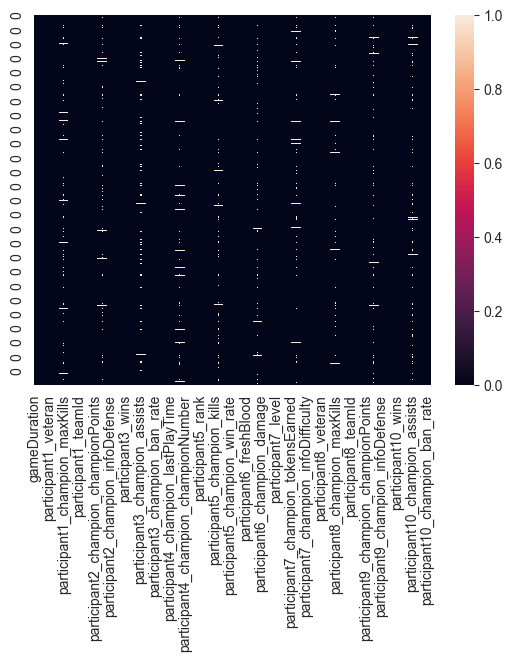

In [8]:
sns.heatmap(df.isna())

C:\Users\morit\AppData\Local\Temp\ipykernel_21248\1072140413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

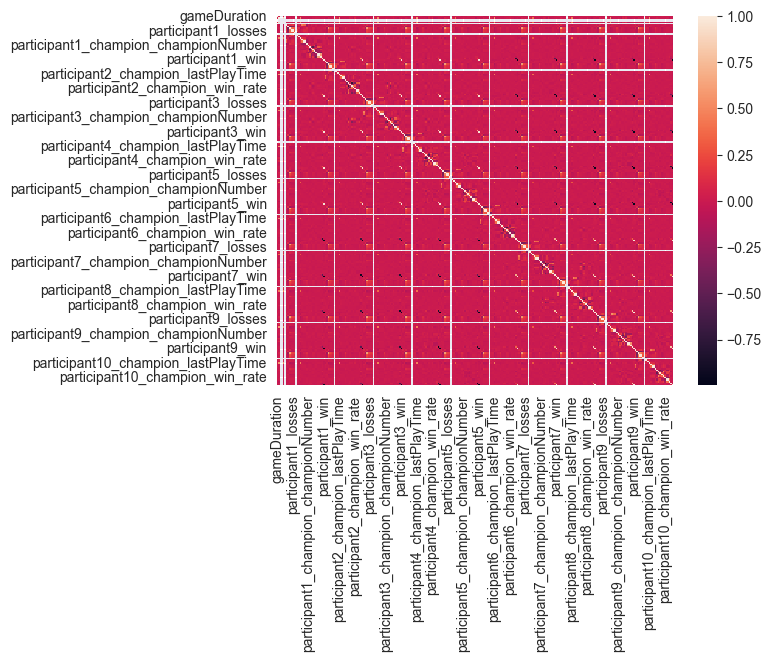

In [9]:
sns.heatmap(df.corr())

In [10]:
df.isna().sum()

gameDuration                        0
gameCreation                        0
gameVersion                         0
mapId                               0
queueId                             0
                                   ..
participant10_champion_pick_rate    0
participant10_champion_ban_rate     0
participant10_champion_matches      0
participant10_teamId                0
participant10_win                   0
Length: 368, dtype: int64

In [11]:
def drop_missing(df: pd.DataFrame) -> pd.DataFrame:
    len_before = len(df)
    df_new = df.dropna(axis=0)
    print(f'dropped {len_before - len(df)} rows')
    return df_new


def replace_missing(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.fillna(-1)
    return df_new

In [12]:
df = drop_missing(df)
#replace_missing(df)

dropped 0 rows


the first 5 participants are always in the same team:

In [13]:
df['participant1_win'] == df['participant2_win']

0     True
0     True
0     True
0    False
0     True
     ...  
0     True
0     True
0     True
0     True
0     True
Length: 20513, dtype: bool

In [14]:
np.all(df['participant1_win'] == df['participant2_win'])

False

In [15]:
df.head()

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_tier,...,participant10_champion_infoDefense,participant10_champion_infoMagic,participant10_champion_infoDifficulty,participant10_champion_tier,participant10_champion_win_rate,participant10_champion_pick_rate,participant10_champion_ban_rate,participant10_champion_matches,participant10_teamId,participant10_win
0,1982,1696715184351,13.19.534.5972,11,420,19,13,EUW1,864,MASTER,...,2,7,10,D,46.80,12.7,12.7,9632,200,False
0,1446,1696175211836,13.19.533.1909,11,420,19,13,EUW1,196,MASTER,...,4,5,9,S,52.19,0.6,0.6,11217,200,False
0,1859,1697133998343,13.20.536.2230,11,420,20,13,EUW1,465,DIAMOND,...,5,7,3,S+,52.19,2.8,2.8,20275,200,True
0,1418,1697914083101,13.20.536.9576,11,420,20,13,EUW1,725,MASTER,...,5,3,6,D,48.23,16.1,16.1,92723,200,False
0,1800,1697564797120,13.20.536.2230,11,420,20,13,KR,110,MASTER,...,0,0,0,S,50.18,5.7,5.7,14487,200,False


In [16]:
def get_winning_team(df: pd.DataFrame):
    df['label'] = np.where(df['participant1_win'], 0, 1)  # 0 = team1 won, 1 = team2 won 

In [17]:
get_winning_team(df)

In [18]:
def drop_wrong_data(df: pd.DataFrame):
    len_before = len(df)
    df.drop(df[df['mapId'] != 11].index, inplace=True)
    df.drop(df[df['queueId'] != 420].index, inplace=True)
    df.drop(df[df['gameDuration'] < 900].index, inplace=True)
    df.drop(df[df['platformId'] != 'EUW1'].index, inplace=True)
    df.drop(df[df['seasonId'] != 13].index, inplace=True)
    df.drop(df[df['gameVersion'] != df['gameVersion'][0]].index, inplace=True)
    df.drop(df[df['patch'] != df['patch'][0]].index, inplace=True)
    print(f'dropped {len_before - len(df)} rows')

In [19]:
df

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_tier,...,participant10_champion_infoMagic,participant10_champion_infoDifficulty,participant10_champion_tier,participant10_champion_win_rate,participant10_champion_pick_rate,participant10_champion_ban_rate,participant10_champion_matches,participant10_teamId,participant10_win,label
0,1982,1696715184351,13.19.534.5972,11,420,19,13,EUW1,864,MASTER,...,7,10,D,46.80,12.7,12.7,9632,200,False,0
0,1446,1696175211836,13.19.533.1909,11,420,19,13,EUW1,196,MASTER,...,5,9,S,52.19,0.6,0.6,11217,200,False,0
0,1859,1697133998343,13.20.536.2230,11,420,20,13,EUW1,465,DIAMOND,...,7,3,S+,52.19,2.8,2.8,20275,200,True,1
0,1418,1697914083101,13.20.536.9576,11,420,20,13,EUW1,725,MASTER,...,3,6,D,48.23,16.1,16.1,92723,200,False,0
0,1800,1697564797120,13.20.536.2230,11,420,20,13,KR,110,MASTER,...,0,0,S,50.18,5.7,5.7,14487,200,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1501,1697673942214,13.20.536.9576,11,420,20,13,NA1,156,GRANDMASTER,...,7,3,S+,52.19,2.8,2.8,20275,200,False,0
0,1055,1696882611189,13.19.534.5972,11,420,19,13,EUN1,345,MASTER,...,10,10,S,51.65,2.4,2.4,5940,200,True,1
0,1111,1697142473871,13.20.536.2230,11,420,20,13,EUW1,709,GOLD,...,5,9,S,52.42,0.6,0.6,13162,200,True,1
0,1987,1696503509102,13.19.534.5972,11,420,19,13,EUW1,724,MASTER,...,3,4,B,49.58,2.7,2.7,12968,200,True,1


In [20]:
drop_wrong_data(df)

KeyboardInterrupt: 

In [ ]:
def drop_irrelevant(df: pd.DataFrame):
    irrelevant_cols = ['gameDuration', 'gameCreation', 'gameVersion', 'mapId', 'queueId', 'patch', 'seasonId',
                       'platformId']
    for i in range(1, 11):
        irrelevant_cols.append(f'participant{i}_win')
    df.drop(columns=irrelevant_cols, inplace=True)


In [ ]:
drop_irrelevant(df)

In [ ]:
df.reset_index(inplace=True, drop=True)
df

In [ ]:
df['participant1_tier']

In [ ]:
from enum import Enum


class Rank(Enum):
    IRON = 0
    BRONZE = 1
    SILVER = 2
    GOLD = 3
    PLATINUM = 4
    EMERALD = 5
    DIAMOND = 6
    MASTER = 7
    GRANDMASTER = 8
    CHALLENGER = 9


def format_rank(tier: str, rank: str) -> str:
    return f'{tier}.{rank}'


def fix_rank(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].apply(lambda x: Rank[x].value)
        df.loc[:, f'participant{i}_tier'] = df.apply(
            lambda x: format_rank(x[f'participant{i}_tier'], x[f'participant{i}_rank']), axis=1)
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].astype(float)
        df.drop(columns=[f'participant{i}_rank'], inplace=True)

In [ ]:
fix_rank(df)
df

In [ ]:
def calc_winrate(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_winrate'] = df[f'participant{i}_wins'] / (
                df[f'participant{i}_wins'] + df[f'participant{i}_losses'])
        df.drop(columns=[f'participant{i}_wins', f'participant{i}_losses'], inplace=True)

In [ ]:
calc_winrate(df)
df

In [ ]:
cols = df.columns.tolist()
index = cols.index('label')
cols = cols[:index] + cols[index + 1:] + [cols[index]]  # label as last column
df = df[cols]

In [ ]:
def fix_teamId(df: pd.DataFrame):
    for i in range(1, 11):
        df.loc[f'participant{i}_teamId'] = df[f'participant{i}_teamId'] // 100 - 1

In [ ]:
fix_teamId(df)
df

In [ ]:
def convert_booleans(df: pd.DataFrame):
    df.replace({True: 1, False: 0}, inplace=True)

In [ ]:
convert_booleans(df)
df

In [ ]:
from datetime import datetime


def convert_lastPlayTime(df: pd.DataFrame):
    for i in range(1, 11):
        df.loc[f'participant{i}_champion_lastPlayTime'] = df[f'participant{i}_champion_lastPlayTime'].apply(
            lambda x: int((datetime.now() - datetime.fromtimestamp(x / 1000)).total_seconds()))

In [ ]:
df[df.isna().any(axis=1)]

In [ ]:
df.isna().sum()

In [ ]:
drop_missing(df)

In [ ]:
convert_lastPlayTime(df)
df

In [ ]:
#for i, col in enumerate(df.columns):
#   plt.figure(i)
#  sns.histplot(df[col], stat='density', kde=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42,
                                                    shuffle=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.append(X_train, np.expand_dims(y_train, axis=1), axis=1)
X_test = np.append(X_test, np.expand_dims(y_test, axis=1), axis=1)

In [ ]:
X_train

In [ ]:
np.shape(np.expand_dims(y_train, axis=1))

In [ ]:
np.shape(X_train)

In [ ]:
np.save('../data/train_static', X_train)
np.save('../data/test_static', X_test)